In [1]:
library("scPred")
library("Seurat")
library("magrittr")
require(here)
proj_dir = here()

result_dir = paste0(proj_dir, "/results/single_cell_data/pbmc_cell_labels/")



Attaching SeuratObject

Loading required package: here

here() starts at /beevol/home/davidson/checkouts/sc_bulk_ood



## Read in Data

In [2]:
# reference data
scpred_reference <- scPred::pbmc_1

# Load each PBMC dataset

data_path_3k = paste0(proj_dir, "/data/single_cell_data/pbmc3k/hg19/")
pbmc.data <- Read10X(data.dir = data_path_3k)
pbmc_3k <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

data_path_6k = paste0(proj_dir, "/data/single_cell_data/pbmc6k/hg19/")
pbmc.data <- Read10X(data.dir = data_path_6k)
pbmc_6k <- CreateSeuratObject(counts = pbmc.data, project = "pbmc6k", min.cells = 3, min.features = 200)

data_path_8k = paste0(proj_dir, "/data/single_cell_data/pbmc8k/GRCh38/")
pbmc.data <- Read10X(data.dir = data_path_8k)
pbmc_8k <- CreateSeuratObject(counts = pbmc.data, project = "pbmc8k", min.cells = 3, min.features = 200)


data_path_68k = paste0(proj_dir, "/data/single_cell_data/pbmc68k/hg19/")
pbmc.data <- Read10X(data.dir = data_path_68k)
pbmc_68k <- CreateSeuratObject(counts = pbmc.data, project = "pbmc68k", min.cells = 3, min.features = 200)


data_path_pbmc2 = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/")
pbmc.data <- Read10X(data.dir = data_path_pbmc2)
pbmc2_10x <- CreateSeuratObject(counts = pbmc.data, project = "pbmc2_10x", min.cells = 3, min.features = 200)


data_path_pbmc1 = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/")
pbmc.data <- Read10X(data.dir = data_path_pbmc1)
pbmc1_10x <- CreateSeuratObject(counts = pbmc.data, project = "pbmc1_10x", min.cells = 3, min.features = 200)


data_path_pbmc1 = paste0(proj_dir, "/data/single_cell_data/GSE132044/sm2_hg19/")
pbmc.data <- Read10X(data.dir = data_path_pbmc1)
pbmc1_sm2 <- CreateSeuratObject(counts = pbmc.data, project = "pbmc1_sm2", min.cells = 3, min.features = 200)




Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


## Process Metadata

### 68K Zheng Data

In [3]:
# add 68K metadata
library(data.table)
metadata_68k_file = paste0(proj_dir, "/data/single_cell_data/pbmc68k/hg19/zheng17_bulk_lables.txt")
metadata_68k = data.frame(fread(metadata_68k_file, header=F, sep="\t"))

barcodes_68k_file = paste0(proj_dir, "/data/single_cell_data/pbmc68k/hg19/barcodes.tsv")
barcodes_68k = data.frame(fread(barcodes_68k_file, header=F, sep="\t"))

row.names(metadata_68k) = barcodes_68k[,1]
metadata_68k = metadata_68k[row.names(pbmc_68k@meta.data),]
metadata_68k = data.frame(metadata_68k)
row.names(metadata_68k) = row.names(pbmc_68k@meta.data)

pbmc_68k <- AddMetaData(
  object = pbmc_68k,
  metadata = metadata_68k,
  col.name = 'cell_type'
)

head(pbmc_68k)

,orig.ident,nCount_RNA,nFeature_RNA,cell_type
,<fct>,<dbl>,<int>,<chr>
AAACATACACCCAA-1,pbmc68k,1216,498,CD8+ Cytotoxic T
AAACATACCCCTCA-1,pbmc68k,1265,472,CD8+/CD45RA+ Naive Cytotoxic
AAACATACCGGAGA-1,pbmc68k,1322,542,CD4+/CD25 T Reg
AAACATACTAACCG-1,pbmc68k,854,349,CD19+ B
AAACATACTCTTCA-1,pbmc68k,1252,446,CD4+/CD25 T Reg
AAACATACTGGATC-1,pbmc68k,1324,476,CD4+/CD25 T Reg
AAACATACTGTCTT-1,pbmc68k,1259,522,CD4+/CD45RO+ Memory
AAACATACTTCTAC-1,pbmc68k,2683,925,CD8+ Cytotoxic T
AAACATTGCTGCTC-1,pbmc68k,1316,489,CD8+/CD45RA+ Naive Cytotoxic


### 6K Harmony labels

In [4]:
# add 6k metadata
library(plyr)

metadata_6k_file = paste0(proj_dir, "/data/single_cell_data/pbmc6k/hg19/cell_labels_harmony.tsv")
metadata_6k = data.frame(fread(metadata_6k_file, header=F, sep="\t"))

barcodes_6k_file = paste0(proj_dir, "/data/single_cell_data/pbmc6k/hg19/barcodes.tsv")
barcodes_6k = data.frame(fread(barcodes_6k_file, header=F, sep="\t"))

colnames(metadata_6k) = c("code", "version", "cell_type")
colnames(barcodes_6k) = c("code")

metadata_6k = subset(metadata_6k, version == "three_prime_v1")
metadata_6k$code = paste0(metadata_6k$code, "-1")

metadata_6k = join(barcodes_6k, metadata_6k, by="code", type="inner")
row.names(metadata_6k) = metadata_6k$code

metadata_6k = metadata_6k[row.names(pbmc_6k@meta.data),]
metadata_6k$cell_type[metadata_6k$cell_type == ""] = "unclassified"
metadata_6k$cell_type[metadata_6k$cell_type == "cd8naive"] = "cd8"
metadata_6k$cell_type[metadata_6k$cell_type == "cd8eff"] = "cd8"
metadata_6k$cell_type[metadata_6k$cell_type == "cd8mem"] = "cd8"
metadata_6k$cell_type[metadata_6k$cell_type == "cd4naive"] = "cd4"
metadata_6k$cell_type[metadata_6k$cell_type == "cd4mem"] = "cd4"


pbmc_6k <- AddMetaData(
  object = pbmc_6k,
  metadata = metadata_6k
)

pbmc_6k_sub = subset(pbmc_6k, subset = cell_type %in% na.omit(unique(metadata_6k$cell_type)))


head(pbmc_6k_sub)


Attaching package: ‘plyr’


The following object is masked from ‘package:here’:

    here




,orig.ident,nCount_RNA,nFeature_RNA,code,version,cell_type
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
AAACATACAACCAC-1,pbmc6k,2028,641,AAACATACAACCAC-1,three_prime_v1,cd8
AAACATACACCAGT-1,pbmc6k,2832,1028,AAACATACACCAGT-1,three_prime_v1,mono14
AAACATACCCGTAA-1,pbmc6k,1804,688,AAACATACCCGTAA-1,three_prime_v1,cd8
AAACATACCTAAGC-1,pbmc6k,1789,621,AAACATACCTAAGC-1,three_prime_v1,cd4
AAACATACCTTCCG-1,pbmc6k,3153,926,AAACATACCTTCCG-1,three_prime_v1,mono14
AAACATACGCGAAG-1,pbmc6k,3415,1189,AAACATACGCGAAG-1,three_prime_v1,bmem
AAACATTGAAGATG-1,pbmc6k,2482,833,AAACATTGAAGATG-1,three_prime_v1,mono14
AAACATTGAAGGTA-1,pbmc6k,1482,672,AAACATTGAAGGTA-1,three_prime_v1,nk
AAACATTGACGGGA-1,pbmc6k,4087,1269,AAACATTGACGGGA-1,three_prime_v1,pdc


### 8K Harmony Labels

In [5]:
# add 8k metadata

metadata_8k_file = paste0(proj_dir, "/data/single_cell_data/pbmc6k/hg19/cell_labels_harmony.tsv")
metadata_8k = data.frame(fread(metadata_8k_file, header=F, sep="\t"))

barcodes_8k_file = paste0(proj_dir, "/data/single_cell_data/pbmc8k/GRCh38/barcodes.tsv")
barcodes_8k = data.frame(fread(barcodes_8k_file, header=F, sep="\t"))

colnames(metadata_8k) = c("code", "version", "cell_type")
colnames(barcodes_8k) = c("code")

metadata_8k = subset(metadata_8k, version == "three_prime_v2")
metadata_8k$code = paste0(metadata_8k$code, "-1")

metadata_8k = join(barcodes_8k, metadata_8k, by="code", type="inner")
row.names(metadata_8k) = metadata_8k$code

metadata_8k = metadata_8k[row.names(pbmc_8k@meta.data),]
metadata_8k$cell_type[metadata_8k$cell_type == ""] = "unclassified"
metadata_8k$cell_type[metadata_8k$cell_type == "cd8eff"] = "cd8"
metadata_8k$cell_type[metadata_8k$cell_type == "cd8mem"] = "cd8"
metadata_8k$cell_type[metadata_8k$cell_type == "cd4mem"] = "cd4"
metadata_8k$cell_type[metadata_8k$cell_type == "treg"] = "cd4"
metadata_8k$cell_type[metadata_8k$cell_type == "bmem"] = "b"
metadata_8k$cell_type[metadata_8k$cell_type == "bnaive"] = "b"
metadata_8k$cell_type[metadata_8k$cell_type == "cd4naive"] = "cd4_cd8_naive"
metadata_8k$cell_type[metadata_8k$cell_type == "cd8naive"] = "cd4_cd8_naive"



pbmc_8k <- AddMetaData(
  object = pbmc_8k,
  metadata = metadata_8k
)

pbmc_8k_sub = subset(pbmc_8k, subset = cell_type %in% na.omit(unique(metadata_8k$cell_type)))


head(pbmc_8k_sub)

,orig.ident,nCount_RNA,nFeature_RNA,code,version,cell_type
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
AAACCTGAGCATCATC-1,pbmc8k,2393,870,AAACCTGAGCATCATC-1,three_prime_v2,b
AAACCTGAGCTAACTC-1,pbmc8k,1694,806,AAACCTGAGCTAACTC-1,three_prime_v2,mono14
AAACCTGAGCTAGTGG-1,pbmc8k,4520,1316,AAACCTGAGCTAGTGG-1,three_prime_v2,cd4
AAACCTGCACATTAGC-1,pbmc8k,2788,898,AAACCTGCACATTAGC-1,three_prime_v2,cd4_cd8_naive
AAACCTGCACTGTTAG-1,pbmc8k,4665,1524,AAACCTGCACTGTTAG-1,three_prime_v2,mono14
AAACCTGCATAGTAAG-1,pbmc8k,4440,1495,AAACCTGCATAGTAAG-1,three_prime_v2,mono14
AAACCTGCATGAACCT-1,pbmc8k,3224,1253,AAACCTGCATGAACCT-1,three_prime_v2,cd8
AAACCTGGTAAGAGGA-1,pbmc8k,5205,1433,AAACCTGGTAAGAGGA-1,three_prime_v2,cd4_cd8_naive
AAACCTGGTAGAAGGA-1,pbmc8k,5493,1632,AAACCTGGTAGAAGGA-1,three_prime_v2,mono14


### PBMC2 10x

In [6]:

# add pbmc2_10x metadata
library(plyr)
metadata_10x_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/GSE132044_meta.txt")
metadata_10x = data.frame(fread(metadata_10x_file, header=F, sep="\t"))

barcodes_10x_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/barcodes.tsv")
barcodes_10x = data.frame(fread(barcodes_10x_file, header=F, sep="\t"))

header_10x = metadata_10x[1,]
metadata_10x = metadata_10x[-c(1,2),]
colnames(metadata_10x) = header_10x

colnames(metadata_10x)[1] = "code"
colnames(barcodes_10x)[1] = "code"
metadata_10x = join(barcodes_10x, metadata_10x, by="code", type="left")
row.names(metadata_10x) = metadata_10x$code

metadata_10x = metadata_10x[row.names(pbmc2_10x@meta.data),]

pbmc2_10x <- AddMetaData(
  object = pbmc2_10x,
  metadata = metadata_10x
)

# get subset
pbmc2_10x_sub = subset(pbmc2_10x, subset = Experiment == "pbmc2")
pbmc2_10x_sub = subset(pbmc2_10x_sub, subset = Method == "10x Chromium (v2)")
head(pbmc2_10x_sub)

,orig.ident,nCount_RNA,nFeature_RNA,code,nGene,nUMI,percent.mito,Cluster,CellType,Experiment,Method
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
pbmc2_10X_V2_AAACCTGAGATGGGTC,pbmc2,2360,1044,pbmc2_10X_V2_AAACCTGAGATGGGTC,1044,2360,0.0419491525423729,2,B cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGAGCGTAATA,pbmc2,1888,803,pbmc2_10X_V2_AAACCTGAGCGTAATA,803,1888,0.0413135593220339,2,B cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGAGCTAGGCA,pbmc2,3455,1371,pbmc2_10X_V2_AAACCTGAGCTAGGCA,1372,3456,0.0353009259259259,1,Cytotoxic T cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGAGGGTCTCC,pbmc2,3801,1518,pbmc2_10X_V2_AAACCTGAGGGTCTCC,1519,3802,0.0420831141504471,6,Dendritic cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGGTCCGAACC,pbmc2,3826,1451,pbmc2_10X_V2_AAACCTGGTCCGAACC,1451,3826,0.0371144798745426,0,CD4+ T cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGTCGTCCGTT,pbmc2,2343,929,pbmc2_10X_V2_AAACCTGTCGTCCGTT,931,2345,0.0652452025586354,0,CD4+ T cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGTCGTCGTTC,pbmc2,2262,852,pbmc2_10X_V2_AAACCTGTCGTCGTTC,852,2262,0.024314765694076,0,CD4+ T cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACCTGTCTTGTACT,pbmc2,5801,1895,pbmc2_10X_V2_AAACCTGTCTTGTACT,1895,5801,0.034304430270643,2,B cell,pbmc2,10x Chromium (v2)
pbmc2_10X_V2_AAACGGGAGTGCAAGC,pbmc2,876,524,pbmc2_10X_V2_AAACGGGAGTGCAAGC,524,876,0.0753424657534247,4,B cell,pbmc2,10x Chromium (v2)


### PBMC1 10x

In [7]:

# add pbmc1_10x metadata
library(plyr)
metadata_10x_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/GSE132044_meta.txt")
metadata_10x = data.frame(fread(metadata_10x_file, header=F, sep="\t"))

barcodes_10x_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/10x_hg19/barcodes.tsv")
barcodes_10x = data.frame(fread(barcodes_10x_file, header=F, sep="\t"))

header_10x = metadata_10x[1,]
metadata_10x = metadata_10x[-c(1,2),]
colnames(metadata_10x) = header_10x

colnames(metadata_10x)[1] = "code"
colnames(barcodes_10x)[1] = "code"
metadata_10x = join(barcodes_10x, metadata_10x, by="code", type="left")
row.names(metadata_10x) = metadata_10x$code

metadata_10x = metadata_10x[row.names(pbmc1_10x@meta.data),]

pbmc1_10x <- AddMetaData(
  object = pbmc1_10x,
  metadata = metadata_10x
)

# get subset
pbmc1_10x_sub = subset(pbmc1_10x, subset = Experiment == "pbmc1")
pbmc1_10x_sub = subset(pbmc1_10x_sub, subset = Method == "10x Chromium (v2) A")
head(pbmc1_10x_sub)

,orig.ident,nCount_RNA,nFeature_RNA,code,nGene,nUMI,percent.mito,Cluster,CellType,Experiment,Method
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
pbmc1_10x_v2_A_AAAGATGCAAAGTCAA,pbmc1,2177,851,pbmc1_10x_v2_A_AAAGATGCAAAGTCAA,851,2177,0.0381258612769867,5,CD14+ monocyte,pbmc1,10x Chromium (v2) A
pbmc1_10x_v2_A_AAAGCAAGTAGGAGTC,pbmc1,3065,1078,pbmc1_10x_v2_A_AAAGCAAGTAGGAGTC,1078,3065,0.0417618270799347,5,CD14+ monocyte,pbmc1,10x Chromium (v2) A
pbmc1_10x_v2_A_AAAGCAATCGGTTCGG,pbmc1,977,538,pbmc1_10x_v2_A_AAAGCAATCGGTTCGG,538,977,0.0992835209825998,4,CD14+ monocyte,pbmc1,10x Chromium (v2) A
pbmc1_10x_v2_A_AAAGTAGTCATTTGGG,pbmc1,4933,1544,pbmc1_10x_v2_A_AAAGTAGTCATTTGGG,1544,4933,0.0427731603486722,5,CD14+ monocyte,pbmc1,10x Chromium (v2) A
pbmc1_10x_v2_A_AAAGTAGTCCGAGCCA,pbmc1,1487,632,pbmc1_10x_v2_A_AAAGTAGTCCGAGCCA,632,1487,0.0477471418964358,4,CD14+ monocyte,pbmc1,10x Chromium (v2) A
pbmc1_10x_v2_A_AAATGCCGTGGCAAAC,pbmc1,1575,666,pbmc1_10x_v2_A_AAATGCCGTGGCAAAC,666,1575,0.0488888888888889,4,CD14+ monocyte,pbmc1,10x Chromium (v2) A
pbmc1_10x_v2_A_AACACGTCAGGTCCAC,pbmc1,3116,1107,pbmc1_10x_v2_A_AACACGTCAGGTCCAC,1107,3116,0.0529525032092426,5,CD14+ monocyte,pbmc1,10x Chromium (v2) A
pbmc1_10x_v2_A_AACACGTCATCACGTA,pbmc1,4947,1608,pbmc1_10x_v2_A_AACACGTCATCACGTA,1608,4947,0.032544976753588,11,Dendritic cell,pbmc1,10x Chromium (v2) A
pbmc1_10x_v2_A_AACCATGTCATATCGG,pbmc1,2513,960,pbmc1_10x_v2_A_AACCATGTCATATCGG,960,2513,0.0803820135296458,5,CD14+ monocyte,pbmc1,10x Chromium (v2) A


### PBMC1 sm2

In [8]:
# add pbmc1_sm2 metadata
library(plyr)
metadata_sm2_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/sm2_hg19/GSE132044_meta.txt")
metadata_sm2 = data.frame(fread(metadata_sm2_file, header=F, sep="\t"))

barcodes_sm2_file = paste0(proj_dir, "/data/single_cell_data/GSE132044/sm2_hg19/barcodes.tsv")
barcodes_sm2 = data.frame(fread(barcodes_sm2_file, header=F, sep="\t"))

header_sm2 = metadata_sm2[1,]
metadata_sm2 = metadata_sm2[-c(1,2),]
colnames(metadata_sm2) = header_sm2

colnames(metadata_sm2)[1] = "code"
colnames(barcodes_sm2)[1] = "code"
metadata_sm2 = join(barcodes_sm2, metadata_sm2, by="code", type="left")
row.names(metadata_sm2) = metadata_sm2$code

metadata_sm2 = metadata_sm2[row.names(pbmc1_sm2@meta.data),]

pbmc1_sm2 <- AddMetaData(
  object = pbmc1_sm2,
  metadata = metadata_sm2
)

# get subset
pbmc1_sm2_sub = subset(pbmc1_sm2, subset = Experiment == "pbmc1")
pbmc1_sm2_sub = subset(pbmc1_sm2_sub, subset = Method == "Smart-seq2")
head(pbmc1_sm2_sub)

,orig.ident,nCount_RNA,nFeature_RNA,code,nGene,nUMI,percent.mito,Cluster,CellType,Experiment,Method
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
pbmc1_SM2_Cell_108,pbmc1,436753,2197,pbmc1_SM2_Cell_108,2200,437125,0.0297434465355702,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_115,pbmc1,335592,2436,pbmc1_SM2_Cell_115,2438,335596,0.0311521658159055,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_133,pbmc1,302204,1874,pbmc1_SM2_Cell_133,1874,302204,0.0431128105727693,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_142,pbmc1,377408,2479,pbmc1_SM2_Cell_142,2480,377420,0.0260323569927476,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_143,pbmc1,385513,2195,pbmc1_SM2_Cell_143,2196,385514,0.0404759383962183,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_144,pbmc1,304952,2214,pbmc1_SM2_Cell_144,2216,304994,0.023409951391094,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_146,pbmc1,410221,2327,pbmc1_SM2_Cell_146,2331,410522,0.0266065031418581,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_148,pbmc1,335187,2075,pbmc1_SM2_Cell_148,2075,335187,0.0446061115049967,0,Cytotoxic T cell,pbmc1,Smart-seq2
pbmc1_SM2_Cell_152,pbmc1,485522,2829,pbmc1_SM2_Cell_152,2830,485530,0.0234517593805909,5,Cytotoxic T cell,pbmc1,Smart-seq2


## Train Reference Model -- Harmony labels of 8K

Centering and scaling data matrix

PC_ 1 
Positive:  CST3, LYZ, MNDA, CSTA, LST1, TYROBP, FCN1, FTL, AIF1, CTSS 
	   TYMP, FCER1G, S100A9, RP11-1143G9.4, LGALS1, FTH1, S100A8, LGALS2, SERPINA1, SPI1 
	   S100A11, FGL2, GRN, PSAP, CFD, GPX1, AP1S2, MS4A6A, CLEC7A, VCAN 
Negative:  LTB, TRAC, CD3D, IL32, TRBC2, CD69, CD3G, CD7, CD27, IL7R 
	   IFITM1, RPS2, CD2, LEF1, CCR7, TRBC1, SPOCK2, CD247, NOSIP, CTSW 
	   TRAT1, GZMM, MAL, CD8B, CD8A, ITM2A, SYNE2, AQP3, PIM2, CDC25B 
PC_ 2 
Positive:  IL32, CD3D, TMSB4X, CTSW, CD7, TRAC, NKG7, GZMA, S100A4, CST7 
	   IFITM1, CCL5, GZMM, CD247, ANXA1, PRF1, CD2, KLRD1, CD3G, PFN1 
	   SRGN, S100A6, ITGB2, KLRB1, ID2, HOPX, IL7R, LYAR, KLRG1, GNLY 
Negative:  CD79A, MS4A1, IGHM, IGHD, CD79B, TCL1A, IGKC, LINC00926, BANK1, CD74 
	   CD22, HLA-DQB1, HLA-DRA, HLA-DPA1, VPREB3, TNFRSF13C, HLA-DPB1, FCER2, FAM129C, MEF2C 
	   RALGPS2, HLA-DRB1, HLA-DQA1, HLA-DOB, FCRLA, SPIB, EAF2, HLA-DMB, HVCN1, TSPAN13 
PC_ 3 
Positive:  LEF1, CCR7, RPS2, MAL, S100A1

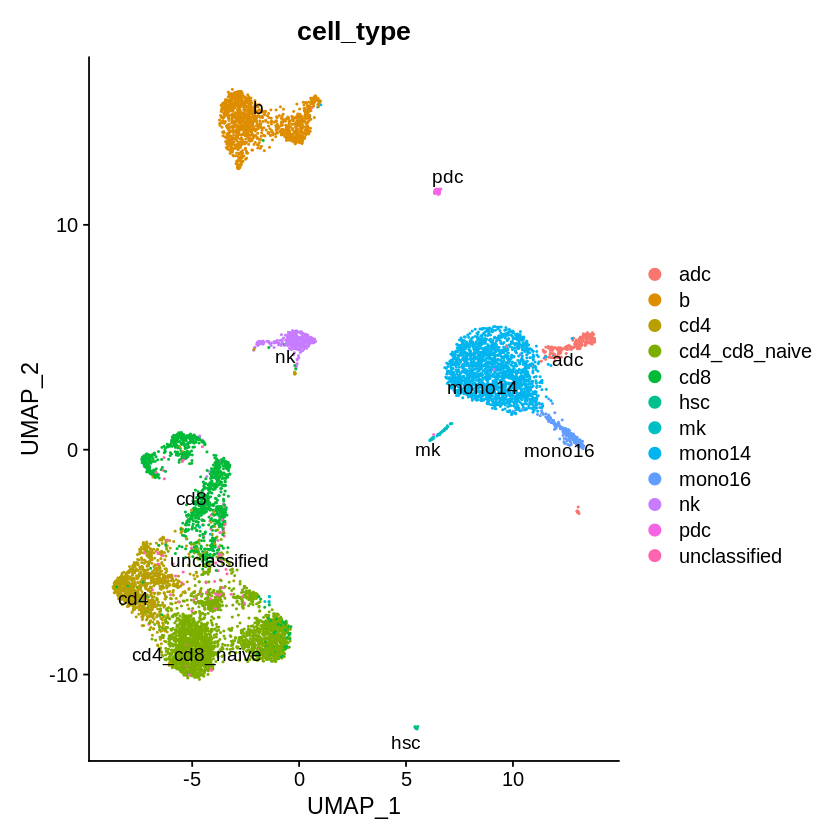

In [9]:
reference <- pbmc_8k_sub %>% 
  NormalizeData() %>% 
  FindVariableFeatures() %>% 
  ScaleData() %>% 
  RunPCA() %>% 
  RunUMAP(dims = 1:30)

DimPlot(reference, group.by = "cell_type", label = TRUE, repel = TRUE)

In [10]:
# now train
reference <- getFeatureSpace(reference, "cell_type")
reference <- trainModel(reference)
get_scpred(reference)

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom



●  Extracting feature space for each cell type...
DONE!
●  Training models for each cell type...


Loading required package: lattice

Loading required package: ggplot2



DONE!


'scPred' object
✔  Prediction variable = cell_type 
✔  Discriminant features per cell type
✔  Training model(s)
Summary

|Cell type     |    n| Features|Method    |   ROC|  Sens|  Spec|
|:-------------|----:|--------:|:---------|-----:|-----:|-----:|
|adc           |  210|       50|svmRadial | 1.000| 0.967| 0.999|
|b             | 1224|       50|svmRadial | 1.000| 0.997| 0.999|
|cd4           |  915|       50|svmRadial | 0.994| 0.893| 0.990|
|cd4_cd8_naive | 2335|       50|svmRadial | 0.994| 0.949| 0.979|
|cd8           | 1083|       50|svmRadial | 0.986| 0.876| 0.990|
|hsc           |   20|       50|svmRadial | 1.000| 0.700| 1.000|
|mk            |   49|       50|svmRadial | 1.000| 0.820| 0.999|
|mono14        | 1824|       50|svmRadial | 1.000| 0.989| 0.997|
|mono16        |  225|       50|svmRadial | 1.000| 0.960| 0.999|
|nk            |  323|       50|svmRadial | 0.997| 0.941| 0.999|
|pdc           |   68|       50|svmRadial | 1.000| 0.927| 1.000|
|unclassified  |  104|       50|sv

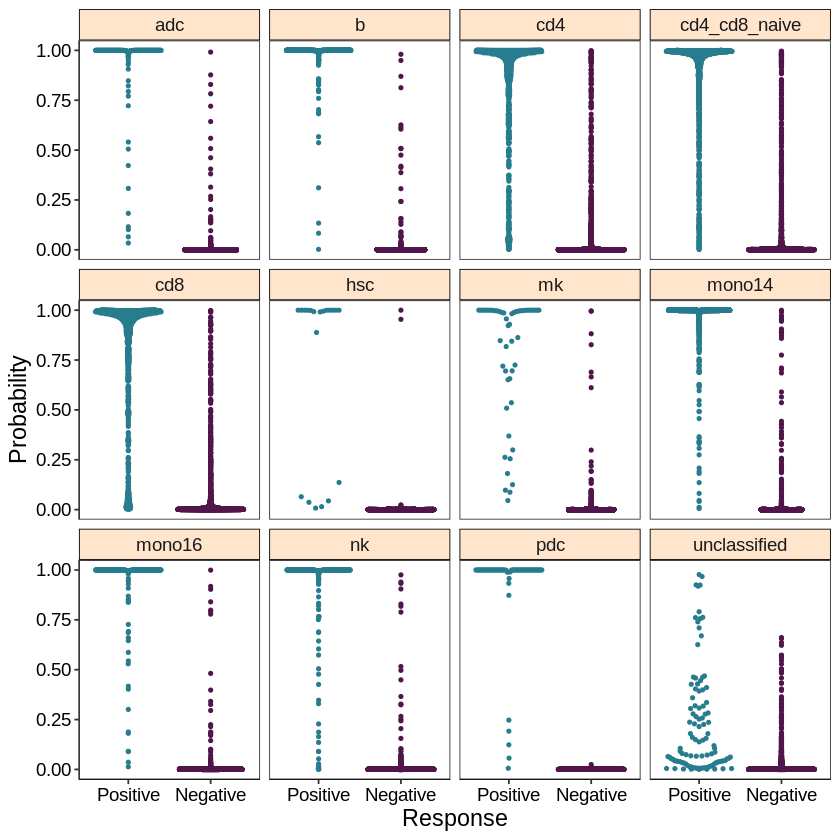

In [11]:
plot_probabilities(reference)

## Apply model to our data

### 3K

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 1502 features shared between reference and new dataset
	 ─ 75.1% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony 9/20

Harmony converged after 9 iterations



●  Classifying cells...
DONE!


10:24:59 UMAP embedding parameters a = 0.9922 b = 1.112

10:24:59 Read 2700 rows and found 30 numeric columns

10:24:59 Using Annoy for neighbor search, n_neighbors = 30

10:24:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:24:59 Writing NN index file to temp file /tmp/RtmpgIuX1i/file59576c9a6edd

10:24:59 Searching Annoy index using 1 thread, search_k = 3000

10:25:00 Annoy recall = 100%

10:25:01 Commencing smooth kNN distance calibration using 1 thread

10:25:02 Initializing from normalized Laplacian + noise

10:25:02 Commencing optimization for 500 epochs, with 113006 positive edges

10:25:13 Optimization finished



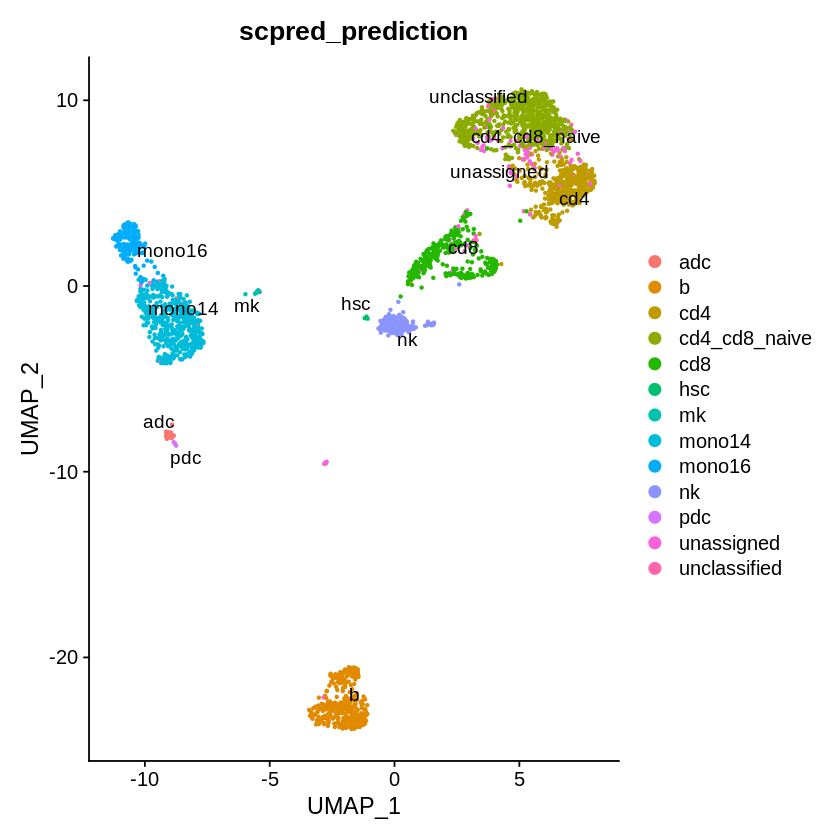

In [12]:
query_3k <- NormalizeData(pbmc_3k)
query_3k <- scPredict(query_3k, reference)
query_3k <- RunUMAP(query_3k, reduction = "scpred", dims = 1:30)
DimPlot(query_3k, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

In [13]:
outfile = paste0(result_dir, "pbmc3k_scpred.tsv")
label_res = query_3k@meta.data
label_res$code = row.names(label_res)
write.table(label_res, outfile, sep="\t", row.names=F, quote=F)


### 6K

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 1590 features shared between reference and new dataset
	 ─ 79.5% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony converged after 7 iterations



●  Classifying cells...
DONE!


10:26:03 UMAP embedding parameters a = 0.9922 b = 1.112

10:26:03 Read 5418 rows and found 30 numeric columns

10:26:03 Using Annoy for neighbor search, n_neighbors = 30

10:26:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:26:04 Writing NN index file to temp file /tmp/RtmpgIuX1i/file59572ebef15

10:26:04 Searching Annoy index using 1 thread, search_k = 3000

10:26:06 Annoy recall = 100%

10:26:06 Commencing smooth kNN distance calibration using 1 thread

10:26:07 Initializing from normalized Laplacian + noise

10:26:08 Commencing optimization for 500 epochs, with 232402 positive edges

10:26:29 Optimization finished



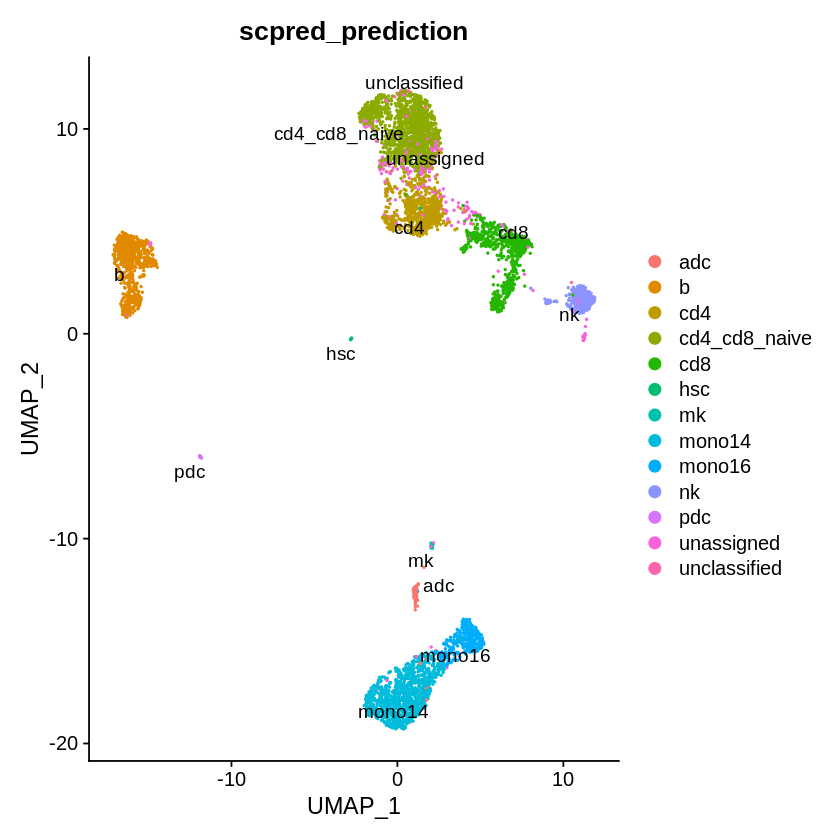

In [14]:
query_6k <- NormalizeData(pbmc_6k)
query_6k <- scPredict(query_6k, reference)
query_6k <- RunUMAP(query_6k, reduction = "scpred", dims = 1:30)
DimPlot(query_6k, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

In [15]:
outfile = paste0(result_dir, "pbmc6k_scpred.tsv")
label_res = query_6k@meta.data
label_res$code = row.names(label_res)
write.table(label_res, outfile, sep="\t", row.names=F, quote=F)


### 68K

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 1805 features shared between reference and new dataset
	 ─ 90.25% of features in the reference are present in new dataset
●  Aligning new data to reference...


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3846550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3846550)”
Harmony 1/20

Harmony 2/20

Harmony converged after 2 iterations



●  Classifying cells...
DONE!


10:33:21 UMAP embedding parameters a = 0.9922 b = 1.112

10:33:21 Read 68551 rows and found 30 numeric columns

10:33:21 Using Annoy for neighbor search, n_neighbors = 30

10:33:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:33:34 Writing NN index file to temp file /tmp/RtmpgIuX1i/file59577c619446

10:33:34 Searching Annoy index using 1 thread, search_k = 3000

10:34:10 Annoy recall = 100%

10:34:11 Commencing smooth kNN distance calibration using 1 thread

10:34:18 Initializing from normalized Laplacian + noise

10:34:46 Commencing optimization for 200 epochs, with 3207900 positive edges

10:36:45 Optimization finished



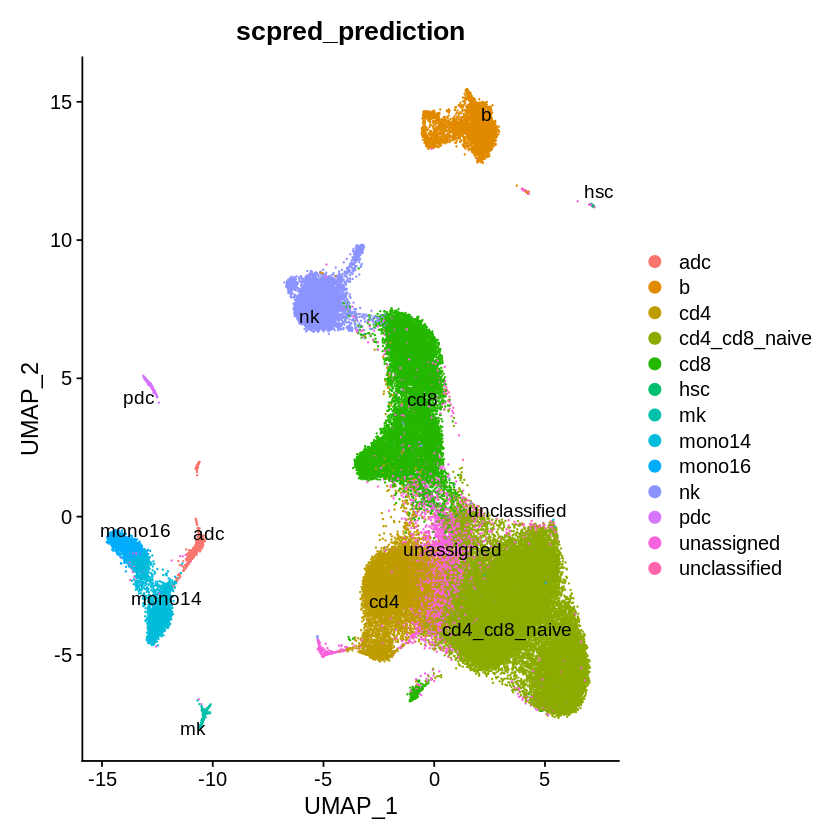

In [16]:
query_68k <- NormalizeData(pbmc_68k)
query_68k <- scPredict(query_68k, reference)
query_68k <- RunUMAP(query_68k, reduction = "scpred", dims = 1:30)
DimPlot(query_68k, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

In [17]:
outfile = paste0(result_dir, "pbmc68k_scpred.tsv")
label_res = query_68k@meta.data
label_res$code = row.names(label_res)
write.table(label_res, outfile, sep="\t", row.names=F, quote=F)


In [18]:
crossTab(query_68k, "cell_type", "scpred_prediction")

,CD14+ Monocyte,CD19+ B,CD34+,CD4+ T Helper2,CD4+/CD25 T Reg,CD4+/CD45RA+/CD25- Naive T,CD4+/CD45RO+ Memory,CD56+ NK,CD8+ Cytotoxic T,CD8+/CD45RA+ Naive Cytotoxic,Dendritic
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
adc,41,0,0,0,0,0,0,0,0,0,637
b,4,3727,0,3,24,6,0,0,41,13,11
cd4,0,3,0,3,5951,186,1576,1,278,751,29
cd4_cd8_naive,78,20,0,5,6644,2536,687,7,558,18247,178
cd8,1,1,0,3,76,1,276,1260,9758,2039,2
hsc,0,0,48,0,0,0,0,0,0,0,0
mk,3,0,169,0,1,6,6,2,9,7,11
mono14,2163,0,0,2,0,0,1,3,9,0,363
mono16,942,0,0,0,1,0,0,0,3,0,216


In [19]:
crossTab(query_68k, "cell_type", "scpred_prediction", output = "prop")

,CD14+ Monocyte,CD19+ B,CD34+,CD4+ T Helper2,CD4+/CD25 T Reg,CD4+/CD45RA+/CD25- Naive T,CD4+/CD45RO+ Memory,CD56+ NK,CD8+ Cytotoxic T,CD8+/CD45RA+ Naive Cytotoxic,Dendritic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
adc,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34
b,0.00,0.98,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.01
cd4,0.00,0.00,0.00,0.16,0.42,0.07,0.50,0.00,0.02,0.03,0.02
cd4_cd8_naive,0.02,0.01,0.00,0.26,0.47,0.91,0.22,0.00,0.05,0.83,0.10
cd8,0.00,0.00,0.00,0.16,0.01,0.00,0.09,0.22,0.85,0.09,0.00
hsc,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mk,0.00,0.00,0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
mono14,0.65,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.19
mono16,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12


### PBMC 2 10x

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 1994 features shared between reference and new dataset
	 ─ 99.7% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony converged after 8 iterations



●  Classifying cells...
DONE!


10:37:29 UMAP embedding parameters a = 0.9922 b = 1.112

10:37:29 Read 3327 rows and found 30 numeric columns

10:37:29 Using Annoy for neighbor search, n_neighbors = 30

10:37:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:37:30 Writing NN index file to temp file /tmp/RtmpgIuX1i/file5957208b53f7

10:37:30 Searching Annoy index using 1 thread, search_k = 3000

10:37:31 Annoy recall = 100%

10:37:31 Commencing smooth kNN distance calibration using 1 thread

10:37:33 Initializing from normalized Laplacian + noise

10:37:33 Commencing optimization for 500 epochs, with 144308 positive edges

10:37:46 Optimization finished



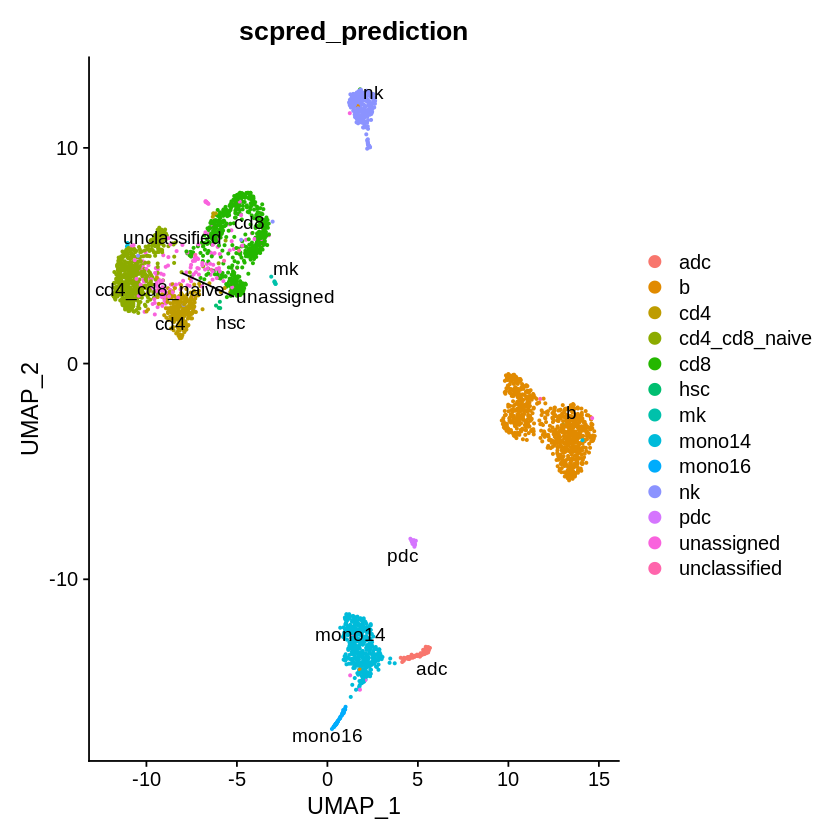

In [20]:
query_2_10x <- NormalizeData(pbmc2_10x_sub)
query_2_10x <- scPredict(query_2_10x, reference)
query_2_10x <- RunUMAP(query_2_10x, reduction = "scpred", dims = 1:30)
DimPlot(query_2_10x, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

In [21]:
outfile = paste0(result_dir, "pbmc_rep2_10xV2.tsv")
label_res = query_2_10x@meta.data
label_res$code = row.names(label_res)
write.table(label_res, outfile, sep="\t", row.names=F, quote=F)


In [22]:
crossTab(query_2_10x, "CellType", "scpred_prediction")

,B cell,CD14+ monocyte,CD16+ monocyte,CD4+ T cell,Cytotoxic T cell,Dendritic cell,Megakaryocyte,Natural killer cell,Plasmacytoid dendritic cell
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
adc,0,1,0,1,0,75,0,0,0
b,855,1,0,3,1,0,0,0,0
cd4,0,0,0,245,18,0,0,0,0
cd4_cd8_naive,0,0,0,565,5,0,0,0,0
cd8,0,0,0,14,579,0,0,2,0
hsc,1,0,0,4,0,0,0,0,0
mk,0,0,0,0,0,0,6,0,0
mono14,2,426,2,1,0,1,0,0,0
mono16,0,3,48,0,0,0,0,0,0


In [23]:
crossTab(query_2_10x, "CellType", "scpred_prediction", output="prop")

,B cell,CD14+ monocyte,CD16+ monocyte,CD4+ T cell,Cytotoxic T cell,Dendritic cell,Megakaryocyte,Natural killer cell,Plasmacytoid dendritic cell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
adc,0.00,0.00,0.00,0.00,0.00,0.99,0,0.00,0
b,0.99,0.00,0.00,0.00,0.00,0.00,0,0.00,0
cd4,0.00,0.00,0.00,0.26,0.03,0.00,0,0.00,0
cd4_cd8_naive,0.00,0.00,0.00,0.59,0.01,0.00,0,0.00,0
cd8,0.00,0.00,0.00,0.01,0.83,0.00,0,0.01,0
hsc,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0
mk,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0
mono14,0.00,0.98,0.04,0.00,0.00,0.01,0,0.00,0
mono16,0.00,0.01,0.96,0.00,0.00,0.00,0,0.00,0


### PBMC 1 10x

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 1994 features shared between reference and new dataset
	 ─ 99.7% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony 9/20

Harmony converged after 9 iterations



●  Classifying cells...
DONE!


10:38:32 UMAP embedding parameters a = 0.9922 b = 1.112

10:38:32 Read 2992 rows and found 30 numeric columns

10:38:32 Using Annoy for neighbor search, n_neighbors = 30

10:38:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:38:33 Writing NN index file to temp file /tmp/RtmpgIuX1i/file59576a1c98c6

10:38:33 Searching Annoy index using 1 thread, search_k = 3000

10:38:34 Annoy recall = 100%

10:38:34 Commencing smooth kNN distance calibration using 1 thread

10:38:35 Initializing from normalized Laplacian + noise

10:38:35 Commencing optimization for 500 epochs, with 128250 positive edges

10:38:48 Optimization finished



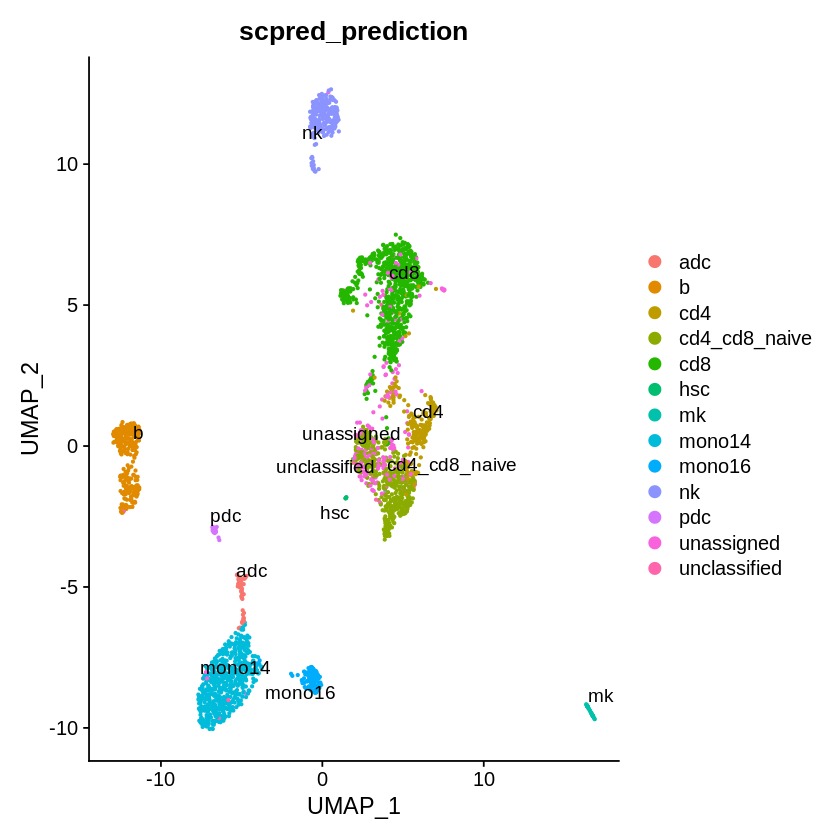

In [24]:
query_1_10x <- NormalizeData(pbmc1_10x_sub)
query_1_10x <- scPredict(query_1_10x, reference)
query_1_10x <- RunUMAP(query_1_10x, reduction = "scpred", dims = 1:30)
DimPlot(query_1_10x, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

In [25]:
outfile = paste0(result_dir, "pbmc_rep1_10xV2a.tsv")
label_res = query_1_10x@meta.data
label_res$code = row.names(label_res)
write.table(label_res, outfile, sep="\t", row.names=F, quote=F)


In [26]:
crossTab(query_1_10x, "CellType", "scpred_prediction")

,B cell,CD14+ monocyte,CD16+ monocyte,CD4+ T cell,Cytotoxic T cell,Dendritic cell,Megakaryocyte,Natural killer cell,Plasmacytoid dendritic cell
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
adc,0,1,0,0,0,50,0,0,0
b,285,0,0,1,0,0,0,0,0
cd4,0,0,0,179,35,0,0,0,0
cd4_cd8_naive,1,1,0,242,219,0,0,0,0
cd8,0,0,0,79,667,0,0,9,0
hsc,0,0,0,6,0,0,0,0,0
mk,0,2,0,0,0,0,29,0,0
mono14,0,582,1,0,1,2,0,0,0
mono16,0,8,101,0,0,1,0,0,0


In [27]:
crossTab(query_1_10x, "CellType", "scpred_prediction", output="prop")

,B cell,CD14+ monocyte,CD16+ monocyte,CD4+ T cell,Cytotoxic T cell,Dendritic cell,Megakaryocyte,Natural killer cell,Plasmacytoid dendritic cell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
adc,0.00,0.00,0.00,0.00,0.00,0.91,0,0.00,0
b,0.99,0.00,0.00,0.00,0.00,0.00,0,0.00,0
cd4,0.00,0.00,0.00,0.33,0.03,0.00,0,0.00,0
cd4_cd8_naive,0.00,0.00,0.00,0.44,0.19,0.00,0,0.00,0
cd8,0.00,0.00,0.00,0.14,0.57,0.00,0,0.05,0
hsc,0.00,0.00,0.00,0.01,0.00,0.00,0,0.00,0
mk,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0
mono14,0.00,0.97,0.01,0.00,0.00,0.04,0,0.00,0
mono16,0.00,0.01,0.99,0.00,0.00,0.02,0,0.00,0


### PBMC 1 sm2

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 1994 features shared between reference and new dataset
	 ─ 99.7% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony 9/20

Harmony converged after 9 iterations



●  Classifying cells...
DONE!


10:39:11 UMAP embedding parameters a = 0.9922 b = 1.112

10:39:11 Read 253 rows and found 30 numeric columns

10:39:11 Using Annoy for neighbor search, n_neighbors = 30

10:39:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:39:11 Writing NN index file to temp file /tmp/RtmpgIuX1i/file59573839afc2

10:39:11 Searching Annoy index using 1 thread, search_k = 3000

10:39:11 Annoy recall = 100%

10:39:12 Commencing smooth kNN distance calibration using 1 thread

10:39:12 Initializing from normalized Laplacian + noise

10:39:12 Commencing optimization for 500 epochs, with 8476 positive edges

10:39:14 Optimization finished



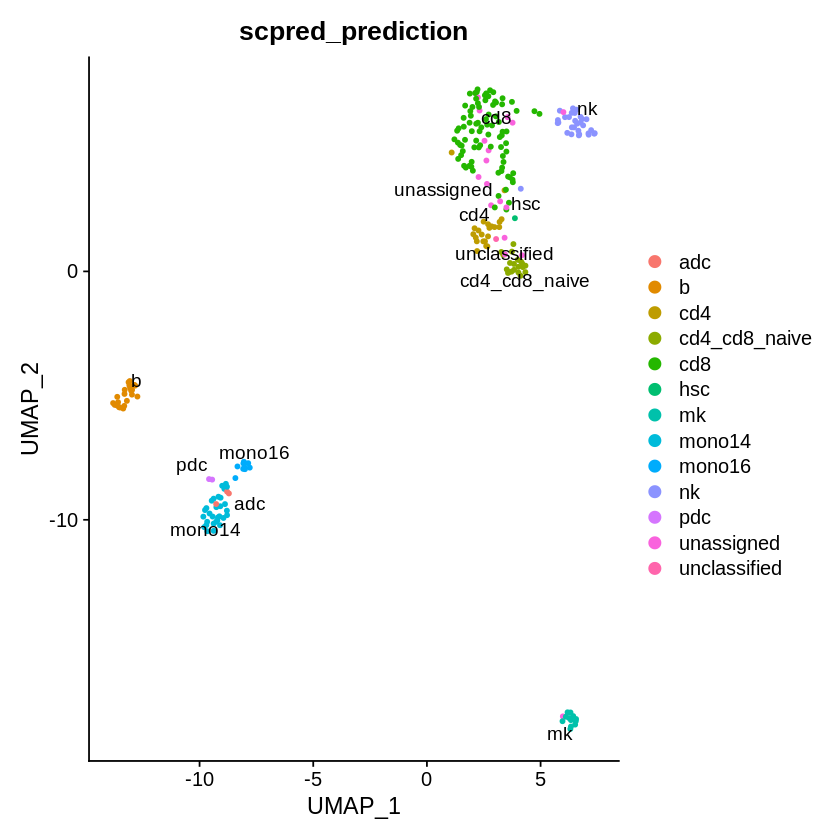

In [28]:
query_1_sm2 <- NormalizeData(pbmc1_sm2_sub)
query_1_sm2 <- scPredict(query_1_sm2, reference)
query_1_sm2 <- RunUMAP(query_1_sm2, reduction = "scpred", dims = 1:30)
DimPlot(query_1_sm2, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

In [29]:
outfile = paste0(result_dir, "pbmc_rep1_sm2.tsv")
label_res = query_1_sm2@meta.data
label_res$code = row.names(label_res)
write.table(label_res, outfile, sep="\t", row.names=F, quote=F)


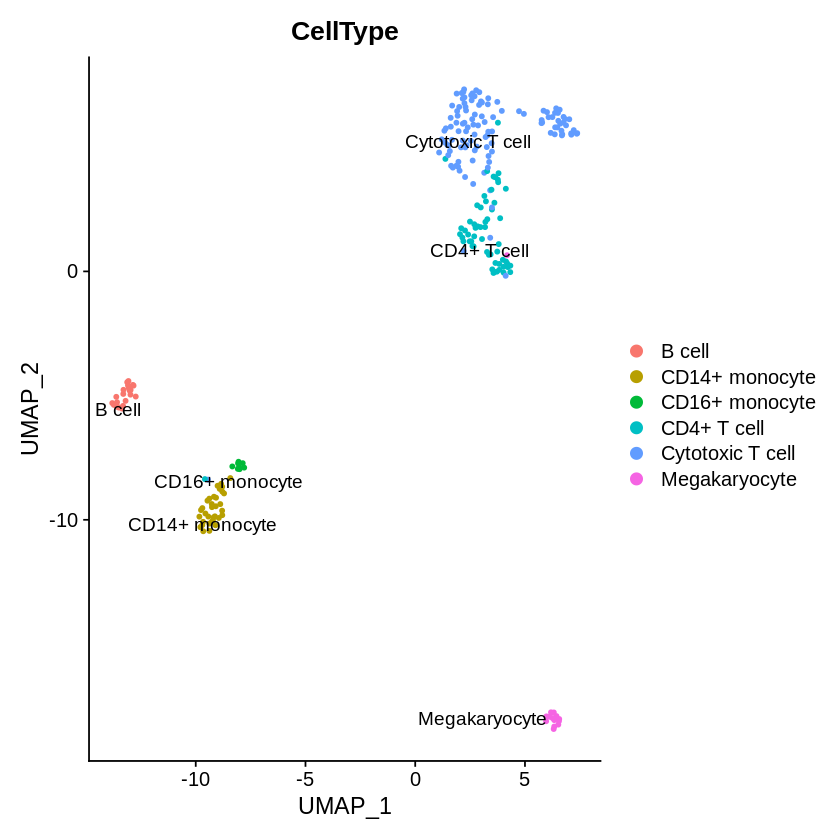

In [30]:
DimPlot(query_1_sm2, group.by = "CellType", label = TRUE, repel = TRUE)

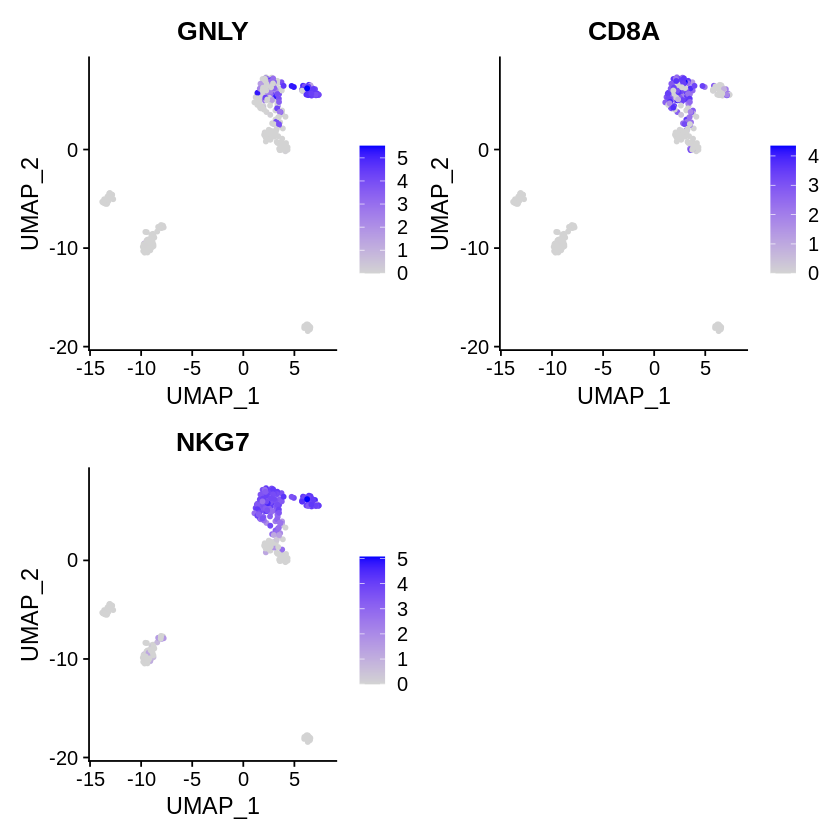

In [31]:
FeaturePlot(query_1_sm2, features = c("GNLY", "CD8A", "NKG7"))

In [32]:
crossTab(query_1_sm2, "CellType", "scpred_prediction")

,B cell,CD14+ monocyte,CD16+ monocyte,CD4+ T cell,Cytotoxic T cell,Megakaryocyte
,<int>,<int>,<int>,<int>,<int>,<int>
adc,0,3,0,0,0,0
b,22,0,0,0,0,0
cd4,0,0,0,19,3,0
cd4_cd8_naive,0,0,0,19,1,0
cd8,0,0,0,12,72,0
hsc,0,0,0,1,0,0
mk,0,0,0,0,0,12
mono14,0,30,0,0,0,0
mono16,0,1,8,0,0,0


In [33]:
crossTab(query_1_sm2, "CellType", "scpred_prediction", output = "prop")

,B cell,CD14+ monocyte,CD16+ monocyte,CD4+ T cell,Cytotoxic T cell,Megakaryocyte
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
adc,0,0.09,0,0.00,0.00,0.00
b,1,0.00,0,0.00,0.00,0.00
cd4,0,0.00,0,0.33,0.03,0.00
cd4_cd8_naive,0,0.00,0,0.33,0.01,0.00
cd8,0,0.00,0,0.21,0.62,0.00
hsc,0,0.00,0,0.02,0.00,0.00
mk,0,0.00,0,0.00,0.00,0.86
mono14,0,0.88,0,0.00,0.00,0.00
mono16,0,0.03,1,0.00,0.00,0.00


### scPred test data

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 1905 features shared between reference and new dataset
	 ─ 95.25% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony 9/20

Harmony 10/20

Harmony 11/20

Harmony 12/20

Harmony 13/20

Harmony 14/20

Harmony 15/20

Harmony converged after 15 iterations



●  Classifying cells...
DONE!


10:40:07 UMAP embedding parameters a = 0.9922 b = 1.112

10:40:07 Read 3500 rows and found 30 numeric columns

10:40:07 Using Annoy for neighbor search, n_neighbors = 30

10:40:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:40:08 Writing NN index file to temp file /tmp/RtmpgIuX1i/file59572659822d

10:40:08 Searching Annoy index using 1 thread, search_k = 3000

10:40:09 Annoy recall = 100%

10:40:10 Commencing smooth kNN distance calibration using 1 thread

10:40:11 Initializing from normalized Laplacian + noise

10:40:11 Commencing optimization for 500 epochs, with 151934 positive edges

10:40:25 Optimization finished



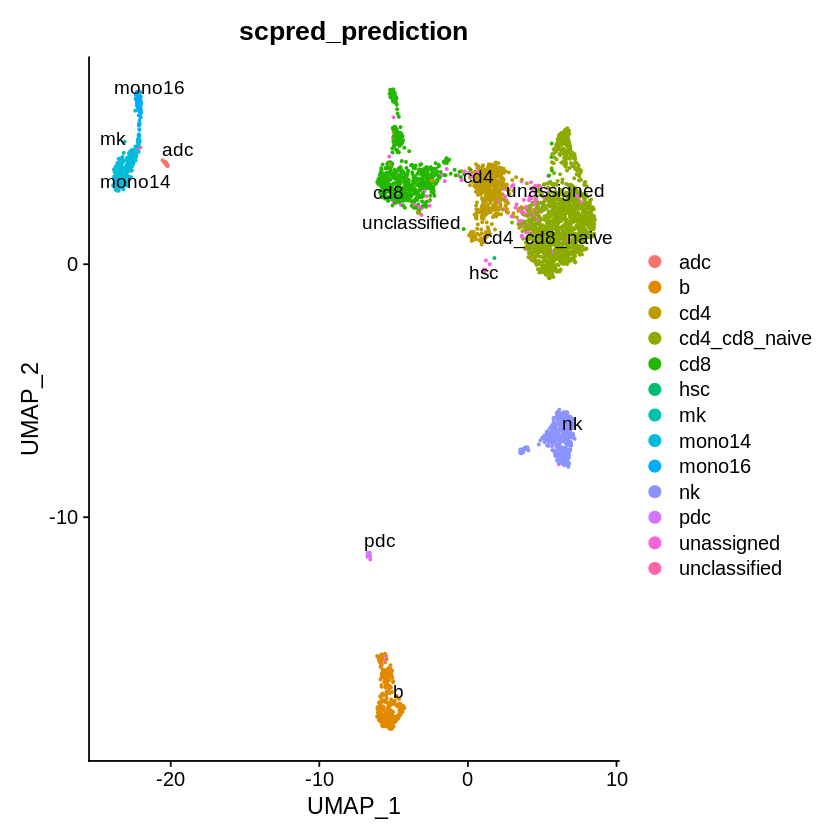

In [34]:
query_scpred1 <- scPred::pbmc_1
query_scpred1 <- NormalizeData(query_scpred1)
query_scpred1 <- scPredict(query_scpred1, reference)
query_scpred1 <- RunUMAP(query_scpred1, reduction = "scpred", dims = 1:30)
DimPlot(query_scpred1, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

In [35]:
crossTab(query_scpred1, "cell_type", "scpred_prediction")

,B cell,CD4 T cell,CD8 T cell,cDC,cMono,ncMono,NK cell,pDC,Plasma cell
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
adc,0,0,0,23,1,0,0,0,0
b,278,0,0,0,0,0,0,0,1
cd4,0,433,29,0,0,0,0,0,0
cd4_cd8_naive,2,1095,207,0,0,0,0,0,0
cd8,0,5,605,0,0,0,5,0,0
hsc,0,0,0,1,0,0,0,0,0
mk,0,0,0,1,2,2,0,0,0
mono14,0,0,0,0,205,4,0,0,0
mono16,0,0,0,0,2,73,0,0,0


In [36]:
crossTab(query_scpred1, "cell_type", "scpred_prediction", output = "prop")

,B cell,CD4 T cell,CD8 T cell,cDC,cMono,ncMono,NK cell,pDC,Plasma cell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
adc,0.00,0.00,0.00,0.88,0.00,0.00,0.00,0,0.00
b,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0,0.17
cd4,0.00,0.27,0.03,0.00,0.00,0.00,0.00,0,0.00
cd4_cd8_naive,0.01,0.68,0.22,0.00,0.00,0.00,0.00,0,0.00
cd8,0.00,0.00,0.64,0.00,0.00,0.00,0.02,0,0.00
hsc,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0,0.00
mk,0.00,0.00,0.00,0.04,0.01,0.03,0.00,0,0.00
mono14,0.00,0.00,0.00,0.00,0.97,0.05,0.00,0,0.00
mono16,0.00,0.00,0.00,0.00,0.01,0.92,0.00,0,0.00


●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 1905 features shared between reference and new dataset
	 ─ 95.25% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony 9/20

Harmony 10/20

Harmony 11/20

Harmony 12/20

Harmony converged after 12 iterations



●  Classifying cells...
DONE!


10:41:09 UMAP embedding parameters a = 0.9922 b = 1.112

10:41:09 Read 3000 rows and found 30 numeric columns

10:41:09 Using Annoy for neighbor search, n_neighbors = 30

10:41:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:41:09 Writing NN index file to temp file /tmp/RtmpgIuX1i/file5957f0a3510

10:41:09 Searching Annoy index using 1 thread, search_k = 3000

10:41:10 Annoy recall = 100%

10:41:11 Commencing smooth kNN distance calibration using 1 thread

10:41:12 Initializing from normalized Laplacian + noise

10:41:12 Commencing optimization for 500 epochs, with 128772 positive edges

10:41:24 Optimization finished



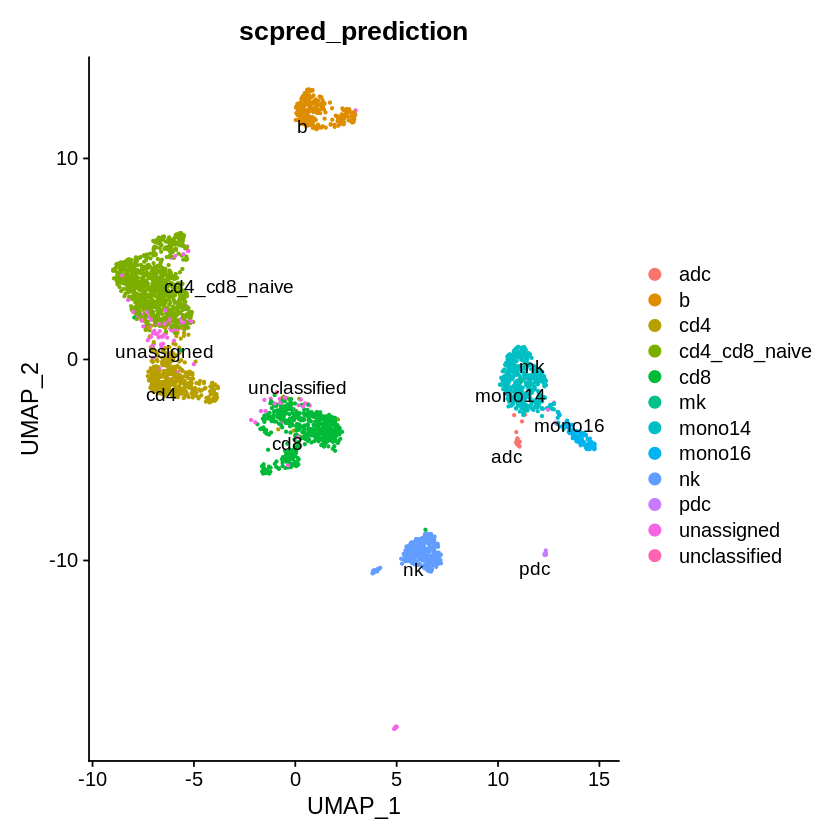

In [37]:
query_scpred2 <- scPred::pbmc_2
query_scpred2 <- NormalizeData(query_scpred2)
query_scpred2 <- scPredict(query_scpred2, reference)
query_scpred2 <- RunUMAP(query_scpred2, reduction = "scpred", dims = 1:30)
DimPlot(query_scpred2, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

In [38]:
crossTab(query_scpred2, "cell_type", "scpred_prediction")

,B cell,CD4 T cell,CD8 T cell,cDC,cMono,ncMono,NK cell,pDC,Plasma cell
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
adc,0,0,0,19,4,0,0,0,0
b,248,0,0,0,0,0,0,0,4
cd4,0,396,20,0,0,0,0,0,0
cd4_cd8_naive,2,763,102,0,0,0,0,0,0
cd8,0,7,481,0,0,0,15,0,0
mk,0,0,0,0,4,0,0,0,0
mono14,0,0,0,0,397,8,0,0,0
mono16,0,0,0,0,0,111,0,0,0
nk,0,0,34,0,1,0,254,0,0


In [39]:
crossTab(query_scpred2, "cell_type", "scpred_prediction", output = "prop")

,B cell,CD4 T cell,CD8 T cell,cDC,cMono,ncMono,NK cell,pDC,Plasma cell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
adc,0.00,0.00,0.00,0.95,0.01,0.00,0.00,0,0.00
b,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0,0.67
cd4,0.00,0.32,0.03,0.00,0.00,0.00,0.00,0,0.00
cd4_cd8_naive,0.01,0.62,0.15,0.00,0.00,0.00,0.00,0,0.00
cd8,0.00,0.01,0.71,0.00,0.00,0.00,0.06,0,0.00
mk,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0,0.00
mono14,0.00,0.00,0.00,0.00,0.97,0.07,0.00,0,0.00
mono16,0.00,0.00,0.00,0.00,0.00,0.93,0.00,0,0.00
nk,0.00,0.00,0.05,0.00,0.00,0.00,0.94,0,0.00
